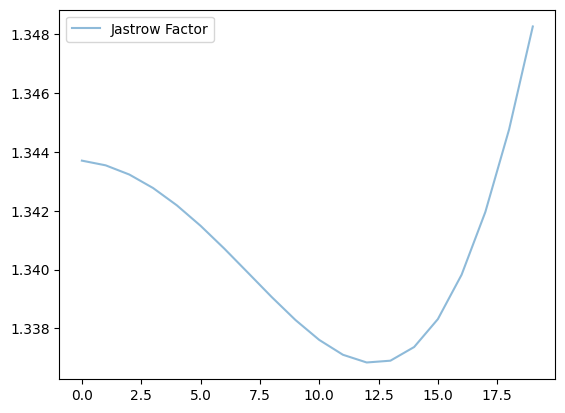

In [100]:
# idea: check numerical vs analytic calculations piece by piece

import numpy as np
import kinetic_energy as kin
import importlib
import matplotlib.pyplot as plt

importlib.reload(kin)

def jastrow(N,R,N_up,b_par,b_orth):
    jastrow_log = 0.
    for i in range(N):
        for j in range(i+1, N):
            r_ij = np.linalg.norm(R[i] - R[j])
    #         print("mb rij",r_ij)
            spin_alignment = 1 if (i < N_up and j < N_up) or (i >= N_up and j >= N_up) else 0
    #         print("spin alignment mb",spin_alignment)
            bij = kin.b_ij(spin_alignment, b_par, b_orth)
            aij = kin.a_ij(spin_alignment)
            jastrow_log += aij * r_ij / (1 + bij * r_ij)
    jastrow_factor = np.exp(jastrow_log)
    return jastrow_factor

box_size = 2 
N = 2
sigma = 1
jastrow_J = lambda X: jastrow(N, X, kin.N_up_choice(N), b_par = 1.0, b_orth = 1.0)
R_test = np.random.uniform(0, box_size, size=(N,2))

length = 20
jastrow_array = np.zeros(length)
jastrow_array_f = np.zeros(length)
for i in range(length):
    R_test[N-1][1]= R_test[N-1][1] + i/200  # Example positions for testing  
    jastrow_array[i] = jastrow(N, R_test, kin.N_up_choice(N), b_par = 1.0, b_orth = 1.0)
plt.plot(np.arange(length), jastrow_array, label='Jastrow Factor',alpha=0.5)
plt.legend()



In [140]:
N = 3
R_test = np.random.uniform(0, box_size, size=(N,2))
jastrow_laplacian_mb = kin.jastrow_laplacian(N, kin.N_up_choice(N),R_test, b_par = 1.0, b_orth =1.0)
jastrow_laplacian_comp = kin.numerical_integrand(jastrow_J, N, R_test, return_laplacian = True)

print("Jastrow Laplacian (MB):", jastrow_laplacian_mb)
print("Jastrow Laplacian (Comp):", jastrow_laplacian_comp)

0.1804010217849026
Jastrow Laplacian (MB): 0.1804010217849026
Jastrow Laplacian (Comp): 0.18040107185868237


is the numerical laplacian ill?

In [124]:
def test_wavefunction(R, alpha=1.0):
    r = R[0]
    v = R[1]
    x, y = r
    z, w = v
    return np.exp(-alpha * (x**2 + y**2)) * np.exp(-alpha * (z**2 + w**2))

def analytical_laplacian(R, alpha=1.0):
    r = R[0]
    v = R[1]
    x, y = r
    z, w = v
    psi = test_wavefunction(R, alpha)
    return (4 * alpha**2 * (x**2 + y**2 + z**2 + w**2) - 8 * alpha) * psi

R_test2 = np.random.uniform(0, box_size, size=(2, 2))  # Two particles in 2D
numerical = kin.numerical_integrand(test_wavefunction, 2, R_test2, return_laplacian=True, h=1e-4)
analytic = analytical_laplacian(R_test2, alpha=1.0)
print("Numerical Laplacian:", numerical)
print("Analytical Laplacian:", analytic)

Numerical Laplacian: 0.012783903124459484
Analytical Laplacian: 0.012783903156125048
